In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.random.seed(1)
n = 100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
products = np.random.choice(['Table', 'Camera', 'Phone'], n)
prices = np.round(np.random.uniform(50.0, 200.0, n), 2)
quantities = np.random.randint(1, 15, n)

data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantity': quantities
}
df = pd.DataFrame(data)
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Camera,191.69,2
1,2050-01-02,Table,137.98,8
2,2050-01-03,Table,185.51,1
3,2050-01-04,Camera,70.62,11
4,2050-01-05,Camera,70.89,11


In [12]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

In [14]:
df.to_csv('random_sales.csv', index=False)

In [19]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'])
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Camera,191.69,2
1,2050-01-02,Table,137.98,8
2,2050-01-03,Table,185.51,1
3,2050-01-04,Camera,70.62,11
4,2050-01-05,Camera,70.89,11


In [20]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [21]:
df.to_excel('sales_data.xlsx')

In [23]:
df.to_json('sales_data.json')

In [24]:
df.shape

(100, 4)

In [26]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,125.00,7.65
min,2050-01-01 00:00:00,50.43,1.00
25%,2050-01-25 18:00:00,78.44,4.00
50%,2050-02-19 12:00:00,133.70,8.00
75%,2050-03-16 06:00:00,165.01,11.00
max,2050-04-10 00:00:00,199.60,14.00
std,NaN,47.84,4.14


In [28]:
df.values[:5]

array([[Timestamp('2050-01-01 00:00:00'), 'Camera', 191.69, 2],
       [Timestamp('2050-01-02 00:00:00'), 'Table', 137.98, 8],
       [Timestamp('2050-01-03 00:00:00'), 'Table', 185.51, 1],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 70.62, 11],
       [Timestamp('2050-01-05 00:00:00'), 'Camera', 70.89, 11]],
      dtype=object)

In [37]:
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales

Product
Camera    260
Phone     208
Table     297
Name: Quantity, dtype: int64

In [42]:
avarege_prices = df.groupby('Product')['Price'].mean().round(2)
avarege_prices

Product
Camera    117.50
Phone     135.16
Table     125.00
Name: Price, dtype: float64

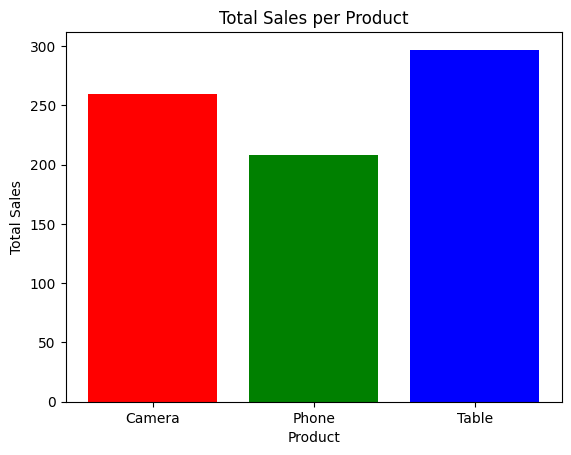

In [41]:
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

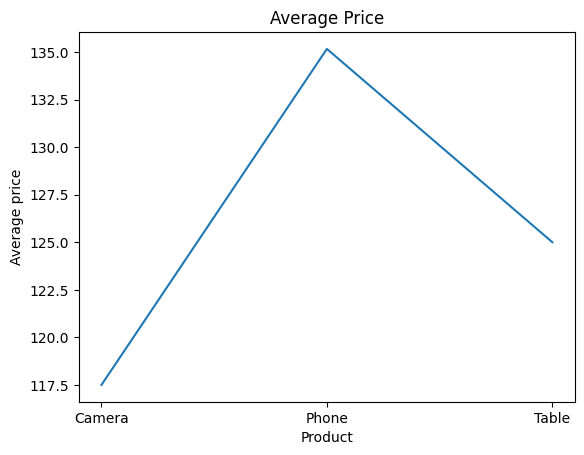

In [45]:
plt.plot(avarege_prices.index, avarege_prices.values)
plt.title('Average Price')
plt.xlabel('Product')
plt.ylabel('Average price')
plt.show()